Olá **Cientista**!

Bem vinda e bem vindo ao **mega desafio do Módulo 01**, neste desafio queremos que você aplique tudo que aprendeu no curso, analisando uma outra informação ~~referente a base de dados de [produção hospitalar](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi), seja número de internação, óbito, AIH ou taxa de mortalidade.~~ 

**P.S: Infelizmente o DataSUS está fora do ar por tempo indeterminado, para você não parar seu projeto, adicionamos no [GitHub](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados) do curso, duas novas bases para você utilizar neste projeto (COVID-19 e Óbitos).**

Uma base é dos **casos de COVID-19 baixadas do projeto [BRASIL.IO](https://brasil.io/dataset/covid19/caso/)**, outra são os números de óbitos registrados no cartório civil desde 1970 retirado do **[Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil)**.

Vocês podem escolher qualquer uma das duas bases de dados, a de COVID-19 é mais desafiadora e você vai precisar descompactar o arquivo por ser grande e entrar no site do Brasil.IO para entender todas as features presentes (No Brasil.IO tem diversas bases sobre COVID-19, estamos usando a chamada **Casos**). A base de óbito é mais simples e relativamente semelhate a utilizada no curso.

Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.



E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook [neste formulário](https://docs.google.com/forms/d/e/1FAIpQLSd1jemhvdo8sM6e-bgOryyZ2P3YuMO6E_mUQXabyBX_xhuZQQ/viewform?usp=sf_link) até dia 22/11 às 23h59.

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.



Fique a vontade para utilizar esse notebook como template projeto.



## Resumo:

Faça aqui o resumo das suas analises, destacando os pontos principais do seu projeto

## Análise dos dados:

Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.

### Importando Bibliotecas

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  matplotlib.ticker as ticker #um formatador de ticks dos gráficos
import seaborn as sns

In [163]:
#chamando as opções de formatação numérica
#incluindo opções de visualização do pandas - globalmente
pd.options.display.float_format = "{:,.2f}".format

### Primeiras explorações

In [164]:
#Criando variáveis para os dois bancos de dados que vamos estudar para escolher qual vamos usar
fonte1 = 'https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/obitos-registro-civil.csv'
fonte2 = 'caso.csv'


In [165]:
#lendo os dois datasets
obitos = pd.read_csv(fonte1) #óbitos por mês e estado no Brasil, desde 1970
covid = pd.read_csv(fonte2) #casos de COVID19


In [166]:
#pegando uma amostra dos dados de covid para conhecer as variáveis
covid.sample(5)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
100259,2020-05-20,BA,Caetité,city,1,0,2,False,"50,975.00","51,081.00","2,905,206.00",1.96,0.00
333726,2020-10-19,PB,Tavares,city,216,2,150,False,"14,726.00","14,759.00","2,516,607.00","1,463.51",0.01
58882,2020-05-07,CE,Jaguaruana,city,7,1,20,False,"33,705.00","33,834.00","2,307,007.00",20.69,0.14
26776,2020-10-12,AL,Jacuípe,city,63,2,150,False,"7,021.00","7,006.00","2,703,502.00",899.23,0.03
539005,2020-06-27,MG,Águas Formosas,city,7,0,24,False,"19,207.00","19,247.00","3,100,906.00",36.37,0.00


In [167]:
#fazendo a mesma coisa para o dataset de óbitos
obitos.tail(5)

,year,month,state,deaths
15025,2020,8,RR,86
15026,2020,8,SC,4666
15027,2020,8,SP,31782
15028,2020,8,SE,1452
15029,2020,8,TO,741


#### Vendo o tamanho e as informações gerais dos datasets

In [168]:
#vendo quantas observações temos em cada um dos datasets
print(covid.shape, obitos.shape)
print(f'O dataset de dados da COVID possui {covid.shape[0]} observações e {covid.shape[1]} variáveis')
print(f'O dataset de dados de Óbitos possui {obitos.shape[0]} observações e {obitos.shape[1]} variáveis')

(936870, 13) (15030, 4)
O dataset de dados da COVID possui 936870 observações e 13 variáveis
O dataset de dados de Óbitos possui 15030 observações e 4 variáveis


Vamos usar o info() para saber os tipos de variável do dataset e também para ver se há algum dado nulo nos datasets que tenha de ser tratado. Como os dois datasets possuem uma relação com data, é uma oportunidade para ver se as colunas referentes a data são do tipo *datetime*.

In [169]:
#usando o info para saber os tipos de variáveis que possuímos
covid.info()
#deste resultado podemos ver que há dados faltantes nas colunas de cidade, população estimada em 2019, 
#população estimada, código da cidade no IBGE e mortes confirmadas por 100mil habitantes.
#minha primeira hipótese é que boa parte destes dados nulos estejam concentrados quando o tipo de lugar é estado e não município

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936870 entries, 0 to 936869
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            936870 non-null  object 
 1   state                           936870 non-null  object 
 2   city                            930535 non-null  object 
 3   place_type                      936870 non-null  object 
 4   confirmed                       936870 non-null  int64  
 5   deaths                          936870 non-null  int64  
 6   order_for_place                 936870 non-null  int64  
 7   is_last                         936870 non-null  bool   
 8   estimated_population_2019       933215 non-null  float64
 9   estimated_population            933215 non-null  float64
 10  city_ibge_code                  933215 non-null  float64
 11  confirmed_per_100k_inhabitants  919888 non-null  float64
 12  death_rate      

In [170]:
#não há nenhuma informação nula neste dataset
obitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15030 entries, 0 to 15029
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    15030 non-null  int64 
 1   month   15030 non-null  int64 
 2   state   15030 non-null  object
 3   deaths  15030 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 469.8+ KB


#### A partir deste momento vamos trabalhar apenas com o Dataset de COVID, vamos usar o de óbitos só para fazer uma visualização dos óbitos em 2020 totais comparados com os óbitos por COVID

In [171]:
#conferindo nulos usando outra função - somente para o dataset de COVID
covid.isna().sum()

date                                  0
state                                 0
city                               6335
place_type                            0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population_2019          3655
estimated_population               3655
city_ibge_code                     3655
confirmed_per_100k_inhabitants    16982
death_rate                            0
dtype: int64

In [172]:
#vou ver a porcentagem de observações nulas em 3 observações: Cidade, código da cidade no IBGE e mortes confirmadas
print(f'O percentual de dados nulos na coluna city é de {((covid.city.isna().sum()/covid.shape[0])*100).round(2)}%')
print(f'O percentual de dados nulos na coluna confirmed_per_100k_inhabitants é de {((covid.confirmed_per_100k_inhabitants.isna().sum()/covid.shape[0])*100).round(2)}%')
print(f'O percentual de dados nulos na coluna city_ibge_code é de {((covid.city_ibge_code.isna().sum()/covid.shape[0])*100).round(2)}%')


O percentual de dados nulos na coluna city é de 0.68%
O percentual de dados nulos na coluna confirmed_per_100k_inhabitants é de 1.81%
O percentual de dados nulos na coluna city_ibge_code é de 0.39%


Baseado na documentação do DataSet de casos de COVID no site, vamos excluir a coluna de população estimada em 2019, pois contém dados desatualizados e as outras medições usam a população estimada em 2020

In [173]:
#excluindo a coluna
dados = covid.drop('estimated_population_2019', axis=1)

Vamos também alterar a coluna date para que seja do tipo *datetime*

In [174]:
#convertendo para datetime
dados['date'] = pd.to_datetime(dados['date'], yearfirst=True)

Vamos incluir uma coluna com as mortes por 100K habitantes

In [175]:
dados['deaths_covid_per_100K_inhabitants'] = dados['deaths']/(dados['estimated_population']/100000)

In [176]:
dados.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_covid_per_100K_inhabitants
0,2020-11-05,AC,NaN,state,31248,697,234,True,"894,470.00",12.00,"3,493.47",0.02,77.92
1,2020-11-04,AC,NaN,state,31218,696,233,False,"894,470.00",12.00,"3,490.11",0.02,77.81
2,2020-11-03,AC,NaN,state,30962,695,232,False,"894,470.00",12.00,"3,461.49",0.02,77.70
3,2020-11-02,AC,NaN,state,30954,693,231,False,"894,470.00",12.00,"3,460.60",0.02,77.48
4,2020-11-01,AC,NaN,state,30951,693,230,False,"894,470.00",12.00,"3,460.26",0.02,77.48


Vamos fazer uma query no dataset para ver onde estão os nulos da coluna estimated_population

In [177]:
# vamos ver se podemos descartar estes boletins
query = dados.loc[dados['estimated_population'].isna()]
query.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_covid_per_100K_inhabitants
26192,2020-11-02,AL,Importados/Indefinidos,city,8,8,219,True,nan,nan,nan,1.00,nan
26193,2020-11-01,AL,Importados/Indefinidos,city,8,8,218,False,nan,nan,nan,1.00,nan
26194,2020-10-31,AL,Importados/Indefinidos,city,8,8,217,False,nan,nan,nan,1.00,nan
26195,2020-10-30,AL,Importados/Indefinidos,city,8,8,216,False,nan,nan,nan,1.00,nan
26196,2020-10-29,AL,Importados/Indefinidos,city,8,8,215,False,nan,nan,nan,1.00,nan


In [178]:
#vendo quais os outros dados nulos que possuímos
query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3655 entries, 26192 to 863551
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   date                               3655 non-null   datetime64[ns]
 1   state                              3655 non-null   object        
 2   city                               3655 non-null   object        
 3   place_type                         3655 non-null   object        
 4   confirmed                          3655 non-null   int64         
 5   deaths                             3655 non-null   int64         
 6   order_for_place                    3655 non-null   int64         
 7   is_last                            3655 non-null   bool          
 8   estimated_population               0 non-null      float64       
 9   city_ibge_code                     0 non-null      float64       
 10  confirmed_per_100k_inhabitants

In [179]:
#conferir se a coluna confirmed e a coluna deaths é igual
query.death_rate.nunique() #fui pela coluna death rate pois ela é uma divisão entre os dados de confirmados e óbitos

573

In [180]:
#outro jeito de fazer a confirmação
query.death_rate.equals(query.confirmed)

False

In [181]:
#conferindo quais as cidades neste subset
query.city.unique()

array(['Importados/Indefinidos'], dtype=object)

In [182]:
#vendo o tipo de lugar no dataset
query.place_type.unique()

array(['city'], dtype=object)

conforme a documentação do dataset, city: nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também). Neste caso a hipótese é que se eu puxar todos os Importados/Indefinidos eu vou ter o mesmo dataset da minha query de população estimada nula

In [183]:
#fazendo um subset com todas as observações de cidade como Importados/Indefinidos
cidade_indefinida = dados[dados.city == 'Importados/Indefinidos']

In [184]:
#conferindo se o query é igual ao cidade_indefinida
query.equals(cidade_indefinida)

True

Neste caso, minha hipótese se confirmou. Vamos levantar uma nova hipótese de que quando a cidade for nula no dataset o tipo de lugar será sempre state

In [185]:
#criando um subset com todas as cidades nulas
cidade_nula = dados[dados.city.isna()]
#criando um subset com todas as observações com tipo de lugar = state
tipo_estado = dados[dados.place_type == 'state']


In [186]:
#conferindo minha hipótese:
cidade_nula.equals(tipo_estado)

True

In [187]:
#conferindo quantas informações nós temos no dataset estadual
tipo_estado.shape

(6335, 13)

In [188]:
#conferindo qual o espaço de tempo entre a observação mais antiga e a observação mais recente
dados.date.max() - dados.date.min()

Timedelta('254 days 00:00:00')

In [189]:
#vendo quantas observações por estado deveríamos ter se todos os estados tivessem informações todos os dias
(dados.date.max() - dados.date.min())*27

Timedelta('6858 days 00:00:00')

In [190]:
#dividindo os dados enter dados por estado e dados por município
dados_por_estado = tipo_estado.drop('city', axis=1)
dados_por_cidade = dados[dados.place_type == 'city']
dados_por_cidade_definida = dados_por_cidade[dados_por_cidade.city != 'Importados/Indefinidos']

In [191]:
#conferindo quantas informações ficaram nos municípios
dados_por_cidade.shape

(930535, 13)

In [192]:
#conferindo quantos casos confirmados e quantos óbitos por estado eu vou perder se eu excluir os dados da nossa query
#conferindo a soma de casos confirmados nos 4 datasets.
#lembrando que não estamos falando do total de casos confirmados pois isso só teremos com a soma de dados pelo último boletim
print(f'a soma de casos confirmados quando a cidade é indefinida é de: {cidade_indefinida.confirmed.sum()}')
print(f'a soma de casos confirmados quando o tipo de lugar é estado é de: {dados_por_estado.confirmed.sum()}')
print(f'a soma de casos confirmados quando a cidade é definida é de: {dados_por_cidade_definida.confirmed.sum()}')
print(f'a soma de casos confirmados quando a tipo de lugar é cidade, seja definida ou indefinida: {dados_por_cidade.confirmed.sum()}')

a soma de casos confirmados quando a cidade é indefinida é de: 4648188
a soma de casos confirmados quando o tipo de lugar é estado é de: 522313733
a soma de casos confirmados quando a cidade é definida é de: 469474867
a soma de casos confirmados quando a tipo de lugar é cidade, seja definida ou indefinida: 474123055


In [193]:
#conferindo a soma de óbitos nos 4 datasets.
#lembrando que não estamos falando do total de óbitos pois isso só teremos com a soma de dados pelo último boletim
print(f'a soma de mortes quando a cidade é indefinida é de: {cidade_indefinida.deaths.sum()}')
print(f'a soma de mortes quando o tipo de lugar é estado é de: {dados_por_estado.deaths.sum()}')
print(f'a soma de mortes quando a cidade é definida é de: {dados_por_cidade_definida.deaths.sum()}')
print(f'a soma de mortes quando a tipo de lugar é cidade, seja definida ou indefinida: {dados_por_cidade.deaths.sum()}')

a soma de mortes quando a cidade é indefinida é de: 51722
a soma de mortes quando o tipo de lugar é estado é de: 17131603
a soma de mortes quando a cidade é definida é de: 15602422
a soma de mortes quando a tipo de lugar é cidade, seja definida ou indefinida: 15654144


As informações de soma me dizem que os boletins possuem dados acumulados de casos confirmados e óbitos.

Considerando que percentual de dados perdidos se eu excluir as informações sem cidade definida fica muito próximo de 0% eu vou optar por usar apenas os dados em que a cidade está definida. A partir de agora vou trabalhar com os dados estaduais e os dados municipais

### Comparando os Estados com mais óbitos em 2020 até agosto  com sua população estimada

Para isso vou usar o dataset de Óbitos (filtrando por ano e estado e a população estimada por estado

In [242]:
#testando uma seleção no dados por estado, pela coluna que define se é o último boletim, para ver se temos pelo menos uma linha por estado
ultimo_boletim_estadual = dados_por_estado.query('is_last == True')
ultimo_boletim_estadual.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_covid_per_100K_inhabitants
0,2020-11-05,AC,state,31248,697,234,True,"894,470.00",12.00,"3,493.47",0.02,77.92
4247,2020-11-03,AP,state,52832,751,228,True,"861,773.00",16.00,"6,130.62",0.01,87.15
7574,2020-11-05,AM,state,164070,4607,234,True,"4,207,714.00",13.00,"3,899.27",0.03,109.49
19808,2020-11-05,AL,state,91270,2258,240,True,"3,351,543.00",27.00,"2,723.22",0.02,67.37
38885,2020-11-05,DF,state,214955,3728,243,True,"3,055,149.00",53.00,"7,035.83",0.02,122.02


In [241]:
#criando uma query com o último boletim de agosto
ultimo_boletim_estadual_agosto = dados_por_estado.query('date == "2020-08-31"')
ultimo_boletim_estadual_agosto.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_covid_per_100K_inhabitants
66,2020-08-31,AC,state,24647,612,168,False,"894,470.00",12.00,"2,755.49",0.02,68.42
4311,2020-08-31,AP,state,43193,661,164,False,"861,773.00",16.00,"5,012.11",0.02,76.70
7640,2020-08-31,AM,state,120296,3649,168,False,"4,207,714.00",13.00,"2,858.94",0.03,86.72
19874,2020-08-31,AL,state,78804,1887,174,False,"3,351,543.00",27.00,"2,351.28",0.02,56.30
38951,2020-08-31,DF,state,162042,2521,177,False,"3,055,149.00",53.00,"5,303.90",0.02,82.52


In [196]:
#vendo se tenho os 27 estados e 27 observações
print(f'A quantidade de estados representados no último boletim é {ultimo_boletim_estadual.state.nunique()}') 
print(f'A quantidade de observações estaduais que são consideradas o último boletim é de: {ultimo_boletim_estadual.shape[0]}')

A quantidade de estados representados no último boletim é 27
A quantidade de observações estaduais que são consideradas o último boletim é de: 27


In [197]:
#vendo se tenho os 27 estados e 27 observações
print(f'A quantidade de estados representados no último boletim de agosto é {ultimo_boletim_estadual_agosto.state.nunique()}') 
print(f'A quantidade de observações estaduais que são consideradas o último boletim de agosto é de: {ultimo_boletim_estadual_agosto.shape[0]}')

A quantidade de estados representados no último boletim de agosto é 27
A quantidade de observações estaduais que são consideradas o último boletim de agosto é de: 27


In [198]:
#capturando os óbitos de 2020
obitos_2020 = obitos.query('year == 2020')

In [199]:
#criando um DF com a soma de mortes por estado (até agosto)
obitos_por_estado_2020 = obitos_2020.groupby(by='state')['deaths'].sum().to_frame().reset_index()

In [200]:
#incluindo os óbitos totais no nosso último boletim de agosto para que os dados fiquem emparelhados
covid_agosto_com_obitos_totais = ultimo_boletim_estadual_agosto.merge(obitos_por_estado_2020, on='state')

In [201]:
covid_agosto_com_obitos_totais.columns

Index(['date', 'state', 'place_type', 'confirmed', 'deaths_x',
       'order_for_place', 'is_last', 'estimated_population', 'city_ibge_code',
       'confirmed_per_100k_inhabitants', 'death_rate',
       'deaths_covid_per_100K_inhabitants', 'deaths_y'],
      dtype='object')

In [203]:
#alterando o nome das colunas
covid_agosto_com_obitos_totais.columns = ['date', 'state', 'place_type', 'confirmed', 'deaths_covid',
       'order_for_place', 'is_last', 'estimated_population', 'city_ibge_code',
       'confirmed_per_100k_inhabitants', 'death_rate',
       'deaths_covid_per_100K_inhabitants', 'deaths_total']

In [204]:
#criando uma coluna com o percentual de mortes por covid  no total de mortes
covid_agosto_com_obitos_totais['rate_deaths_by_covid'] = covid_agosto_com_obitos_totais['deaths_covid']/covid_agosto_com_obitos_totais['deaths_total']

In [205]:
#criando uma coluna para as mortes totais por 100k habitantes
covid_agosto_com_obitos_totais['deaths_total_per_100K_inhabitants'] = covid_agosto_com_obitos_totais['deaths_total']/(covid_agosto_com_obitos_totais['estimated_population']/100000)

In [206]:
covid_agosto_com_obitos_totais.head()

,date,state,place_type,confirmed,deaths_covid,order_for_place,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_covid_per_100K_inhabitants,deaths_total,rate_deaths_by_covid,deaths_total_per_100K_inhabitants
0,2020-08-31,AC,state,24647,612,168,False,"894,470.00",12.00,"2,755.49",0.02,68.42,3250,0.19,363.34
1,2020-08-31,AP,state,43193,661,164,False,"861,773.00",16.00,"5,012.11",0.02,76.70,2214,0.30,256.91
2,2020-08-31,AM,state,120296,3649,168,False,"4,207,714.00",13.00,"2,858.94",0.03,86.72,13336,0.27,316.94
3,2020-08-31,AL,state,78804,1887,174,False,"3,351,543.00",27.00,"2,351.28",0.02,56.30,14031,0.13,418.64
4,2020-08-31,DF,state,162042,2521,177,False,"3,055,149.00",53.00,"5,303.90",0.02,82.52,12152,0.21,397.75


In [207]:
#conferindo o percentual mínimo e o máximo de mortes por covid entre os estados
covid_agosto_com_obitos_totais.rate_deaths_by_covid.min(), covid_agosto_com_obitos_totais.rate_deaths_by_covid.max()

(0.05711767738073463, 0.3037909836065574)

In [208]:
#conferindo quais são os estados com menor e maior percentual
menor = covid_agosto_com_obitos_totais.query('rate_deaths_by_covid == rate_deaths_by_covid.min()')['state']
maior = covid_agosto_com_obitos_totais.query('rate_deaths_by_covid == rate_deaths_by_covid.max()')['state']
print(menor)
print(maior)

24    RS
Name: state, dtype: object
21    RR
Name: state, dtype: object


As mortes por COVID até agosto representam entre 5 e 30% dos óbitos nos estados, sendo o menor percentual no Rio Grande do Sul e o maior percentual em Roraima

In [209]:
#soma de casos confirmados no último boletim
ultimo_boletim_estadual.confirmed.sum()

5616476

In [210]:
#soma de casos confirmados no último boletim de agosto
ultimo_boletim_estadual_agosto.confirmed.sum()

3914829

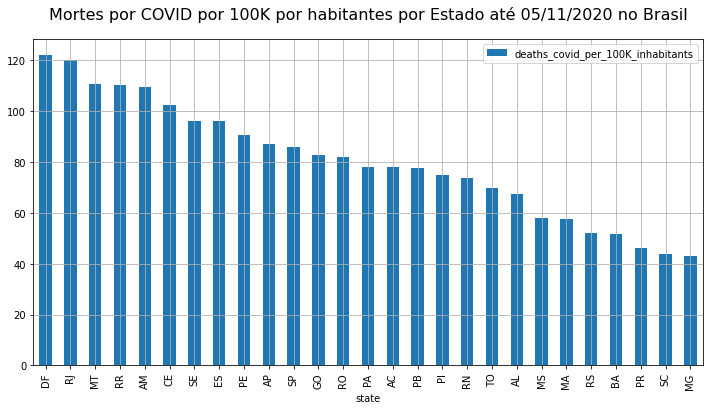

In [230]:
#vamos visualizar os estados pela quantidade de mortes por covid por 100k habitantes
ultimo_boletim_estadual.sort_values(by='deaths_covid_per_100K_inhabitants',
                                    ascending = False).plot(x='state', 
                                                            y='deaths_covid_per_100K_inhabitants', 
                                                            kind='bar', 
                                                            figsize=(12,6), grid=True);
plt.title('Mortes por COVID por 100K por habitantes por Estado até 05/11/2020 no Brasil', fontsize=16, pad=20);

Vemos pelo gráfico acima que o DF é o estado com mais mortes por 100mil habitantes, enquanto MG é o estado com menos mortes por 100mil habitantes.

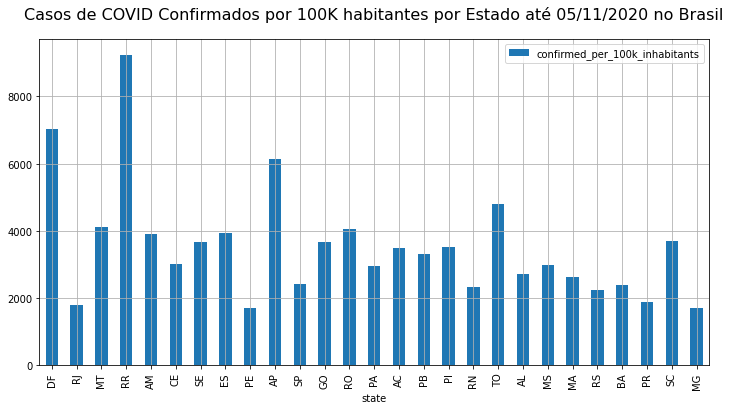

In [228]:
#vamos visualizar os estados pela quantidade de mortes por covid por 100k habitantes
ultimo_boletim_estadual.sort_values(by='deaths_covid_per_100K_inhabitants',
                                    ascending = False).plot(x='state', 
                                                            y='confirmed_per_100k_inhabitants', 
                                                            kind='bar', 
                                                            figsize=(12,6), grid=True);
plt.title('Casos de COVID Confirmados por 100K habitantes por Estado até 05/11/2020 no Brasil', fontsize=16, pad=20);

Ao organizamos o gráfico de casos confirmados por 100K por estado pela quantidade de mortes por 100mil habitantes, vemos que a taxa de mortalidade não é a mesma entre os estados, o que pode indicar, entre outras coisas, a falta de testes.  Vamor reorganizar o gráfico anterior para visualizar qual o estado com o maior e o menor número de casos confirmados por 100mil

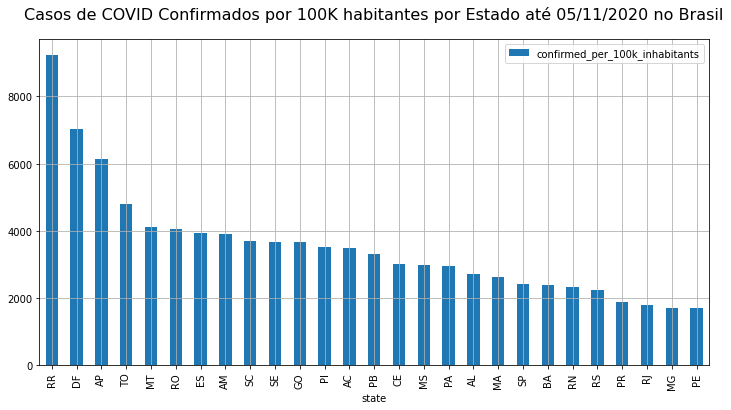

In [229]:
#vamos visualizar os estados pela quantidade de casos confirmados por covid por 100k habitantes
ultimo_boletim_estadual.sort_values(by='confirmed_per_100k_inhabitants',
                                    ascending = False).plot(x='state', 
                                                            y='confirmed_per_100k_inhabitants', 
                                                            kind='bar', 
                                                            figsize=(12,6), grid=True);
plt.title('Casos de COVID Confirmados por 100K habitantes por Estado até 05/11/2020 no Brasil', fontsize=16, pad=20);

Neste caso Roraima é o estado com a maior taxa de casos confirmados por 100K habitantes. Interessante lembrar que é também o estado com a maior taxa de mortes por COVID dentre o total de mortes em agosto. Já Pernambuco é o estado com a menor taxa de casos confirmados por 100K habitantes, mas o novo estado por número de mortes por 100K

Vamos agora visualizar a taxa de mortalidade, por estado

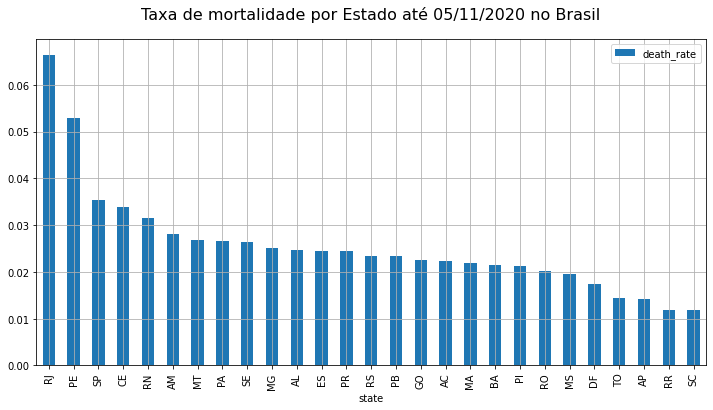

In [240]:
#vamos visualizar os estados pela quantidade de casos confirmados por covid por 100k habitantes
ultimo_boletim_estadual.sort_values(by='death_rate',
                                    ascending = False).plot(x='state', 
                                                            y='death_rate', 
                                                            kind='bar', 
                                                            figsize=(12,6), grid=True);
plt.title('Taxa de mortalidade por Estado até 05/11/2020 no Brasil', fontsize=16, pad=20);


O estado com a maior taxa de mortalidade é o Rio de Janeiro e o estado com a menor taxa de mortalidade é Santa Catarina. Podemos ver essa relação considerando que ele é o segundo estado com o maior número de mortes por 100K, mas o 24º em número de casos confirmados

### Buscando o último boletim por município

In [251]:
#criando um dataset apenas com o último boletim por cidade
ultimo_boletim_municipal = dados_por_cidade_definida.query('is_last == True')

In [252]:
#vamos ver quantas cidades únicas temos nesse dataset
ultimo_boletim_municipal.city.nunique()

5294

In [247]:
#vamos ver quantas cidades únicas a gente tem no dataset de onde tiramos os dados únicos
dados_por_cidade_definida.city.nunique()

5294

In [257]:
#buscando quais são as cidades duplicadas
ultimo_boletim_municipal['duplicado'] = ultimo_boletim_municipal.duplicated('city')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [260]:
#vendo a quantidade de cidades duplicadas
ultimo_boletim_municipal.query('duplicado == True').shape

(273, 14)

In [262]:
#vendo a lista de cidades duplicadas
print(list(ultimo_boletim_municipal.query('duplicado == True')['city']))

['Milagres', 'Santana', 'Bonito', 'Campo Grande', 'Jardim', 'Mundo Novo', 'Presidente Dutra', 'Santa Inês', 'Santa Luzia', 'Viana', 'Barro Alto', 'Davinópolis', 'Hidrolândia', 'Jussara', 'Morrinhos', 'Mundo Novo', 'Piranhas', 'São Domingos', 'Canarana', 'Rio Branco', 'Belém', 'Bonito', 'Redenção', 'Barra de São Miguel', 'Belém', 'Conde', 'Mulungu', 'Nova Olinda', 'Pedra Branca', 'Pilar', 'Queimadas', 'Riachão', 'Santa Helena', 'Santa Inês', 'Santa Luzia', 'Santa Rita', 'Santa Teresinha', 'São Bento', 'São Domingos', 'Taperoá', 'Água Branca', 'Alagoinha', 'Bom Jardim', 'Bonito', 'Cedro', 'Condado', 'Itambé', 'Jatobá', 'Paulista', 'Primavera', 'Quixaba', 'Salgadinho', 'Santa Cruz', 'Santa Terezinha', 'Terra Nova', 'Trindade', 'Triunfo', 'Batalha', 'Bom Jesus', 'Caracol', 'Jurema', 'Novo Santo Antônio', 'Santa Filomena', 'Várzea Grande', 'Água Branca', 'Boa Esperança', 'Bom Sucesso', 'Cachoeira Dourada', 'Campestre', 'Candeias', 'Canápolis', 'Formoso', 'Lagoa Grande', 'Lagoa Santa', 'Ouro

### Próximo passo: Verificar qual dos dados entre as cidades duplicadas é o mais recente para manter no dataset